# SIR Model with Time Dependent Parameters - COVID-19 case

### Setting Up Packages

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Set Input Parameters

In [2]:
# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
lam, p, gamma = 3, 0.05, 1./14

# beta: number of people that an infectious person can infect within a single time period
beta = lam * p

In [3]:
# Total population.
N_total = 330000000

N = N_total

# A grid of time points (in days) for the detecting period
t = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
# Note: here R0 denotes the number of recovered people at time 0; not the disease reproductive number R_0 (R_naught)
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

### Model Engine

In [4]:
# The SIR model differential equations.
# Input: the current system state (S, I, R), t, and parameters
# Output: changes in system state
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Generate Trajectories for S(t), I(t), R(t)

In [5]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Here outputs S,I,R are trajectories over the simulation time horizon, 
# i.e., S is a vector of the numbers of susceptible people at each time step, check by printing it out:
#print S


### Plot Trajectories for S(t), I(t), R(t)

/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_78122/1835762605.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


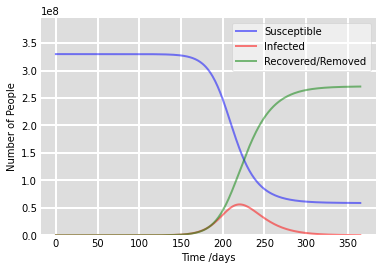

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0,N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Time Dependent  R_0

In [7]:
L_shutdown = 60 # The day that R_naught changed
L_relax = 1000 # The day that restrictions are relaxed

In [8]:
# The SIR model differential equations.
# The only difference frmo the previous version, is that now beta is time dependent
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [9]:
def beta_dynamic(t):
    value = 1.0 * gamma
    if t < L_shutdown:
        value = 5.0 * gamma
    elif t < L_relax:
        value = 0.9 * gamma
    else:
        value = 2.5 * gamma
    return value

In [10]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t, args=(N, beta_dynamic, gamma))
S, I, R = ret.T

/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_78122/182282824.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


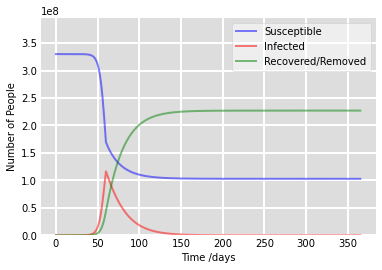

In [11]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0, N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Smooth R_0 transition

In [12]:
R_0_start, k, x0, R_0_end = 5.0, 0.5, 60, 0.5

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def logistic_beta(t):
    return ((R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end) * gamma

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t, args=(N, logistic_beta, gamma))
S, I, R = ret.T

/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_78122/182282824.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


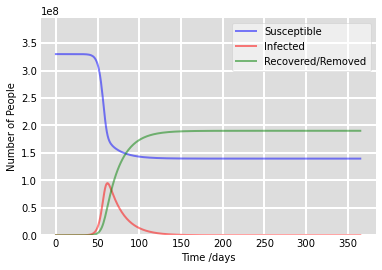

In [13]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0, N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Fit Model to Data

In [14]:
from scipy import integrate, optimize
import pandas as pd

In [15]:
cleaned_data = pd.read_csv('data/cleaned_data.csv')

In [19]:
all_states = list(cleaned_data['state'].unique())

In [23]:
filtered_data = cleaned_data[cleaned_data['state'] == 'AL']
filtered_data['date'] = pd.to_datetime(filtered_data['date'])
filtered_data['time_difference'] = filtered_data['date'].diff()
print(filtered_data.sample(10))
is_continuous = filtered_data['time_difference'].dt.total_seconds().eq(filtered_data['time_difference'].dt.total_seconds().mean())

# Check if the datetime column is continuous
if is_continuous.all():
    print("The datetime column is continuous.")
else:
    print("The datetime column is not continuous.")
    


          date state  positive  population  active_percentage time_difference
488 2020-06-25    AL   33206.0   4903185.0           0.006772         -1 days
327 2020-12-03    AL  260359.0   4903185.0           0.053100         -1 days
483 2020-06-30    AL   38045.0   4903185.0           0.007759         -1 days
333 2020-11-27    AL  242874.0   4903185.0           0.049534         -1 days
530 2020-05-14    AL   10968.0   4903185.0           0.002237         -1 days
572 2020-04-02    AL    1233.0   4903185.0           0.000251         -1 days
495 2020-06-18    AL   28206.0   4903185.0           0.005753         -1 days
576 2020-03-29    AL     806.0   4903185.0           0.000164         -1 days
403 2020-09-18    AL  142863.0   4903185.0           0.029137         -1 days
351 2020-11-09    AL  204857.0   4903185.0           0.041780         -1 days
The datetime column is not continuous.


/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_78122/9764858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_78122/9764858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time_difference'] = filtered_data['date'].diff()


In [25]:
for state in all_states:
    filtered_data = cleaned_data[cleaned_data['state'] == state ]
    y_total = list(filtered_data['active_percentage'])
    x_total = range(0, len(set(filtered_data['date']))) #这里漏了一个range
    N = list(filtered_data['population'])[0]

    ydata = np.array(y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)
    
    # Returns the active case counts over time
    def fit_odeint(x, beta, gamma, I0):
        S0 = N - I0
        R0 = 0
        return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

    all_popt = []
    # popt - calculated optimal parameter values that can minimize the sum of squared errors
    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))
    all_popt.append(popt)


In [26]:
ydata = np.array(y_total, dtype=float) * N
xdata = np.array(x_total, dtype=float)

# Returns the active case counts over time
def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

# popt - calculated optimal parameter values that can minimize the sum of squared errors
popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))

In [27]:
print(popt)

[1.03424725e-01 9.65758542e-02 4.42869495e+04]


In [ ]:
fitted = fit_odeint(xdata, *popt)

In [ ]:
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.show()